In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


    pip install "git+git://github.com/bblais/classy" --upgrade

In [2]:
from classy import *

Version:  0.0.25


#### Please *please* **please** keep your data somewhere outside of our shared google drive.  I don't want 30 copies of big image data sets.

In [3]:
data=load_excel('/Users/bblais/Desktop/ai373/data/iris.xls',verbose=True)

iris.data 151 5
150 vectors of length 4
Feature names: 'petal length in cm', 'petal width in cm', 'sepal length in cm', 'sepal width in cm'
Target values given.
Target names: 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'
Mean:  [3.75866667 1.19866667 5.84333333 3.054     ]
Median:  [4.35 1.3  5.8  3.  ]
Stddev:  [1.75852918 0.76061262 0.82530129 0.43214658]


In [5]:
data

{'vectors': array([[1.4, 0.2, 5.1, 3.5],
        [1.4, 0.2, 4.9, 3. ],
        [1.3, 0.2, 4.7, 3.2],
        [1.5, 0.2, 4.6, 3.1],
        [1.4, 0.2, 5. , 3.6],
        [1.7, 0.4, 5.4, 3.9],
        [1.4, 0.3, 4.6, 3.4],
        [1.5, 0.2, 5. , 3.4],
        [1.4, 0.2, 4.4, 2.9],
        [1.5, 0.1, 4.9, 3.1],
        [1.5, 0.2, 5.4, 3.7],
        [1.6, 0.2, 4.8, 3.4],
        [1.4, 0.1, 4.8, 3. ],
        [1.1, 0.1, 4.3, 3. ],
        [1.2, 0.2, 5.8, 4. ],
        [1.5, 0.4, 5.7, 4.4],
        [1.3, 0.4, 5.4, 3.9],
        [1.4, 0.3, 5.1, 3.5],
        [1.7, 0.3, 5.7, 3.8],
        [1.5, 0.3, 5.1, 3.8],
        [1.7, 0.2, 5.4, 3.4],
        [1.5, 0.4, 5.1, 3.7],
        [1. , 0.2, 4.6, 3.6],
        [1.7, 0.5, 5.1, 3.3],
        [1.9, 0.2, 4.8, 3.4],
        [1.6, 0.2, 5. , 3. ],
        [1.6, 0.4, 5. , 3.4],
        [1.5, 0.2, 5.2, 3.5],
        [1.4, 0.2, 5.2, 3.4],
        [1.6, 0.2, 4.7, 3.2],
        [1.6, 0.2, 4.8, 3.1],
        [1.5, 0.4, 5.4, 3.4],
        [1.5, 0.1, 5.2, 4.1],

In [5]:
data.vectors.shape

(150, 4)

In [7]:
subset=extract_features(data,[0,2])

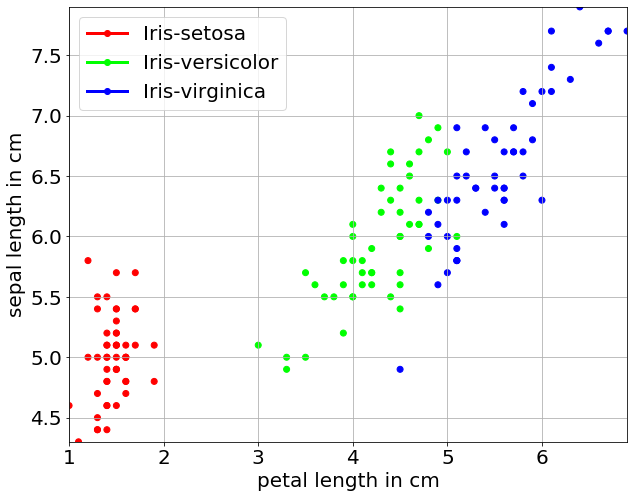

In [8]:
plot2D(subset,legend_location='upper left')

## Classification

In [8]:
C=Perceptron()

In [9]:
data_train,data_test=split(data,test_size=0.2)

Original vector shape:  (150, 4)
Train vector shape:  (120, 4)
Test vector shape:  (30, 4)


In [10]:
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print("Training time: ",timeit())

Time Reset
Training time:  0.008910894393920898 seconds 


In [11]:
print("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets))
print("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets))

On Training Set: 70.83333333333334
On Test Set: 56.666666666666664


In [12]:
C.weights

array([[-12.4,  -6.5,   3.5,   8.6],
       [ 12.5, -26.1,  11.4, -30.7],
       [ 46.6,  53.9, -43.1, -33. ]])

In [53]:
C.predict(array([1.5,5]).reshape(1, -1))

array([0])

In [54]:
C.output(array([1.5,5]).reshape(1, -1))

array([[   6.15,   -1.5 , -189.6 ]])

In [55]:
X=array([1.5,5]).reshape(1, -1)

In [56]:
X

array([[1.5, 5. ]])

In [57]:
dot(X,C.weights.T)+C.biases

array([[   6.15,   -1.5 , -189.6 ]])

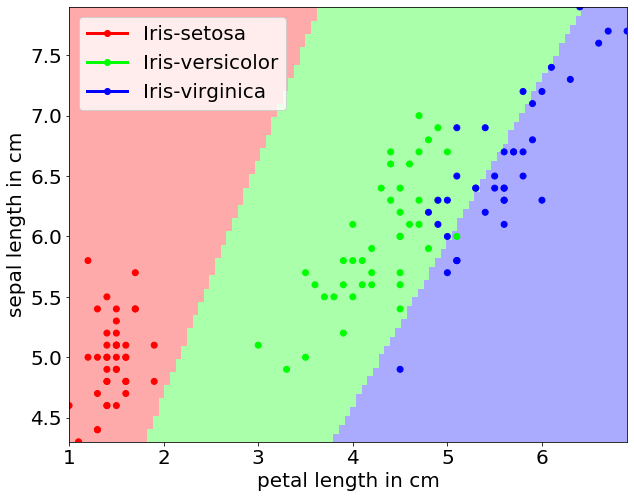

In [58]:
plot2D(data_train,C)

In [13]:
C=BackProp(max_iter=6000)

In [14]:
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print("Training time: ",timeit())

Time Reset
Training time:  3.7324271202087402 seconds 


/Users/bblais/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [15]:
print("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets))
print("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets))

On Training Set: 100.0
On Test Set: 86.66666666666667


In [16]:
plot2D(data_train,C,number_of_grid_points=300)

AssertionError: Function only works for 2D data.

In [82]:
[w.shape for w in C.weights]

[(2, 100), (100, 3)]